# Fundamentals of Data Science and Engineering <small>   <br>  MASTER IN DATA SCIENCE AND ENGINEERING </small>


## Analytical decision support systems

**Professor:** Gonçalo Figueira / Daniel Silva<br>
**Student:** Guilherme Salles <br>

### Index:

* [Linear Programming](#sec1)
* [Constraint Programming](#sec2)

# Constraint Programming <a class="anchor" id="sec2"></a>


In [39]:
 #!pip install docplex

In [40]:
from docplex.cp.model import *

In [41]:
#!pip install cplex

### N_Queens

In [42]:
from docplex.cp.model import CpoModel
from sys import stdout

In [43]:
NB_QUEEN = 4

mdl = CpoModel(name="NQueen")

# Create column index of each queen
x = mdl.integer_var_list(NB_QUEEN, 0, NB_QUEEN - 1, "X")

# One queen per raw
mdl.add(mdl.all_diff(x))

# One queen per diagonal xi - xj != i - j
mdl.add(mdl.all_diff(x[i] + i for i in range(NB_QUEEN)))

# One queen per diagonal xi - xj != j - i
mdl.add(mdl.all_diff(x[i] - i for i in range(NB_QUEEN)))

In [44]:
print("\nSolving model....")
msol = mdl.solve(TimeLimit=10)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Satisfiability problem - 4 variables, 3 constraints
 ! TimeLimit            = 10
 ! Initial process time : 0.02s (0.02s extraction + 0.00s propagation)
 !  . Log search space  : 8.0 (before), 8.0 (after)
 !  . Memory usage      : 299.0 kB (before), 299.0 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed    W       Branch decision
 *                     14  0.06s        1         3 != X_3
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 40
 ! Number of fails        : 15
 ! Total memory usage     : 2.1 MB (2.1 MB CP Optimizer + 0.0 MB Concert)
 ! Time spent in solve    : 0.06s (0.04s engine + 0.0

In [45]:
try:
    import numpy as np
    import matplotlib.pyplot as plt
    VISU_ENABLED = True
except ImportError:
    VISU_ENABLED = False

In [46]:
def display(sol):
    %matplotlib inline
    
    chess_board = np.zeros((NB_QUEEN, NB_QUEEN, 3))
    black = 0.5
    white = 1
    for l in range(NB_QUEEN):
        for c in range(NB_QUEEN):
            if (l%2 == c%2):
                col = white
            else:
                col = black
            chess_board[l,c,::]=col

    fig, ax = plt.subplots(figsize=(NB_QUEEN / 2, NB_QUEEN / 2))
    ax.imshow(chess_board, interpolation='none')
    #wq_im_file = "WQueen.png"
    #bq_im_file = "BQueen.png"
    wq_im_file = "https://github.com/IBMDecisionOptimization/docplex-examples/blob/master/examples/cp/jupyter/n_queen_utils/WQueen.png?raw=true"
    bq_im_file = "https://github.com/IBMDecisionOptimization/docplex-examples/blob/master/examples/cp/jupyter/n_queen_utils/BQueen.png?raw=true"
    wq = plt.imread(wq_im_file)
    bq = plt.imread(bq_im_file)
    for y, x in enumerate(sol):
        if (x%2 == y%2):
            queen = bq
        else:
            queen = wq 
        ax.imshow(queen, extent=[x-0.4, x + 0.4, y - 0.4, y + 0.4])
    ax.set(xticks=[], yticks=[])
    ax.axis('image')
    plt.show()

Solution: 1 3 0 2
Solve time: 0.0500002


<ipython-input-46-f77f2de2e089>:21: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  wq = plt.imread(wq_im_file)
<ipython-input-46-f77f2de2e089>:22: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  bq = plt.imread(bq_im_file)


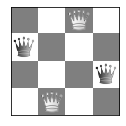

In [47]:
if msol != None: 
    stdout.write("Solution:")
    sol = [msol[v] for v in x]
    for v in range(NB_QUEEN):
        stdout.write(" " + str(sol[v]))
    stdout.write("\n")
    stdout.write("Solve time: " + str(msol.get_solve_time()) + "\n")
    if VISU_ENABLED:
        display(sol)
else:
    stdout.write("No solution found\n")

 ### 3A + B + C = 10

In [48]:
 #Example Slide 18
    
#Model    
mdl = CpoModel(name="ABC")

#Variables
A = mdl.integer_var(1,2,"A")
B = mdl.integer_var(1,2,"B")
C = mdl.integer_var(1,3,"C")

numbers = (A, B, C)

#Restrictions:
# 1.All diff
mdl.add(mdl.all_diff(numbers))

# 2. Sum 3A+B+C=10
mdl.add(3*A+B+C==10)


In [49]:
print("\nSolving model....")
msol = mdl.solve(TimeLimit=10)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Satisfiability problem - 3 variables, 2 constraints
 ! TimeLimit            = 10
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 0.0 (before), 0.0 (after)
 !  . Memory usage      : 266.9 kB (before), 266.9 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed    W       Branch decision
 *                      0  0.00s                     -
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 0
 ! Number of fails        : 0
 ! Total memory usage     : 530.0 kB (490.0 kB CP Optimizer + 39.9 kB Concert)
 ! Time spent in solve    : 0.00s (0.00s engine + 0.00

In [50]:
if msol != None: 
    print("Solution status: " + msol.get_solve_status())
    
    for char in numbers:
        print(f" {char}: {msol[char]}")
else:
    stdout.write("No solution found\n")

Solution status: Feasible
 A = intVar(1, 2): 2
 B = intVar(1, 2): 1
 C = intVar(1..3): 3


 ### Exercise Slide36

In [51]:
 #Example Slide 36
    
#Model    
mdl = CpoModel(name="ABC")

#Variables
A = mdl.integer_var(1,5,"A")
B = mdl.integer_var(1,5,"B")
C = mdl.integer_var(1,5,"C")

numbers = (A, B, C)

#Restrictions:
# 1.All diff
#mdl.add(mdl.all_diff(numbers))

# 2.
mdl.add(A<5)
mdl.add(B<A)
mdl.add(C>B)
mdl.add(C<A)

In [52]:
print("\nSolving model....")
msol = mdl.solve(TimeLimit=10)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Satisfiability problem - 3 variables, 4 constraints
 ! TimeLimit            = 10
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 3.0 (before), 3.0 (after)
 !  . Memory usage      : 266.9 kB (before), 266.9 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed    W       Branch decision
 *                      2  0.01s        1         3  = A
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 10
 ! Number of fails        : 0
 ! Total memory usage     : 2.1 MB (2.0 MB CP Optimizer + 0.0 MB Concert)
 ! Time spent in solve    : 0.01s (0.01s engine + 0.00s 

In [53]:
if msol != None: 
    print("Solution status: " + msol.get_solve_status())
    
    for char in numbers:
        print(f" {char}: {msol[char]}")
else:
    stdout.write("No solution found\n")

Solution status: Feasible
 A = intVar(1..5): 3
 B = intVar(1..5): 1
 C = intVar(1..5): 2


### MAGIC SQUARE


In [54]:
MSQUARE= 9

mdl = CpoModel(name="MSQUARE")

# Create column index for square
x = mdl.integer_var_list(MSQUARE,0,9, "x")

s = mdl.integer_var(15)

# All diff
mdl.add(mdl.all_diff(x))

# Restriction for Sum 
mdl.add([x[1-1]+x[2-1]+x[3-1]== s])
mdl.add([x[4-1]+x[5-1]+x[6-1]== s])
mdl.add([x[7-1]+x[8-1]+x[9-1]== s])

mdl.add([x[1-1]+x[4-1]+x[7-1]== s])
mdl.add([x[2-1]+x[5-1]+x[8-1]== s])
mdl.add([x[3-1]+x[6-1]+x[9-1]== s])

mdl.add([x[1-1]+x[5-1]+x[9-1]== s])
mdl.add([x[3-1]+x[5-1]+x[7-1]== s])



In [55]:
print("\nSolving model....")
msol = mdl.solve(TimeLimit=10)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Satisfiability problem - 10 variables, 9 constraints
 ! TimeLimit            = 10
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 33.6 (before), 33.6 (after)
 !  . Memory usage      : 299.3 kB (before), 299.3 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed    W       Branch decision
 *                    128  0.01s        1         8  = x_2
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 577
 ! Number of fails        : 279
 ! Total memory usage     : 2.2 MB (2.1 MB CP Optimizer + 0.0 MB Concert)
 ! Time spent in solve    : 0.02s (0.02s engine 

In [56]:
if msol != None: 
    stdout.write("Solution:")
    sol = [msol[v] for v in x]
    for v in range(MSQUARE):
        stdout.write(" " + str(sol[v]))
    stdout.write("\n")
    stdout.write("Solve time: " + str(msol.get_solve_time()) + "\n")
else:
    stdout.write("No solution found\n")

Solution: 6 1 8 7 5 3 2 9 4
Solve time: 0.02


### MAP Coloring Australia

In [57]:
mdl = CpoModel(name="MColoring")

# Create states position to receive color
WA = mdl.integer_var(0,3, "WA")
NT = mdl.integer_var(0,3, "NT")
SA = mdl.integer_var(0,3, "SA")
QLD = mdl.integer_var(0,3, "QLD")
NSW = mdl.integer_var(0,3, "NSW")
VIC = mdl.integer_var(0,3, "VIC")
TAS = mdl.integer_var(0,3, "TAS")
ALL_STATES = (WA, NT, SA, QLD, NSW, VIC, TAS)

# Restriction 
# Not have same color on adjacent state
mdl.add(WA != NT)
mdl.add(WA != SA)

mdl.add(NT != WA)
mdl.add(NT != QLD)
mdl.add(NT != SA)

mdl.add(SA != QLD)
mdl.add(SA != NSW)
mdl.add(SA != VIC)

mdl.add(QLD != NSW)

mdl.add(NSW != VIC)

mdl.add(VIC != TAS)

# Minimize the use of colors
mdl.add(mdl.minimize(WA+NT+SA+QLD+NSW+VIC+TAS))

In [60]:
# Solve model
print("\nSolving model....")
msol = mdl.solve(TimeLimit=10)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Minimization problem - 7 variables, 11 constraints
 ! Presolve      : 9 extractables eliminated, 4 constraints generated
 ! TimeLimit            = 10
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 14.0 (before), 14.0 (after)
 !  . Memory usage      : 299.2 kB (before), 299.2 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0          7                 -
 + New bound is 0
                        0          7    1            -
 + New bound is 1
                        2          7    1   F     0 != WA
 + New bound is 2
 *             5        9  0.03s        1      (gap is 60.00%)
               5       23          1    1            -
 + New bound is 5 (gap is 0.00%)
 ! 

In [62]:
if msol != None: 
    print("Solution status: " + msol.get_solve_status())
    colors = ("Yellow", "Red", "Green", "Blue")
    for state in ALL_STATES:
        print(f" {state.get_name()}: {colors[msol[state]]}")
else:
    stdout.write("No solution found\n")

Solution status: Optimal
 WA: Yellow
 NT: Red
 SA: Green
 QLD: Yellow
 NSW: Red
 VIC: Yellow
 TAS: Red


### MAP Coloring Australia (solution 02)

In [63]:
##Alternative 

def Cmap():
    model = CpoModel()

    NStates = 7
    StateNames = ["WA", "NT", "SA", "Q", "NSW", "V", "T"]
    StateAdjacencies = [ (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,5), (5,6) ]
    MaxColors = 5

    StateColors = model.integer_var_list(NStates, 1, MaxColors, "StateColors")
    ColorCounts = model.integer_var_list(MaxColors, 0, NStates, "ColorCounts")
    AllColors = list( range(1, MaxColors+1) )

    for a, b in StateAdjacencies:
        model.add(StateColors[a-1] != StateColors[b-1])

    model.add(model.distribute(ColorCounts, StateColors, AllColors))

    model.add(model.maximize(model.count(ColorCounts, 0)) )

    solution = model.solve(TimeLimit=120)
    
    if solution:
        solution.print_solution()

### Wedding Table

In [64]:
mdl = CpoModel(name="WeddingTable")

#TABLE_SIZE = 6
#table = mdl.integer_var_list(TABLE_SIZE,1,6, "table")


# Create the persons variable to receive the spot to sit 1...6
A = mdl.integer_var(1,6, "A")
B = mdl.integer_var(1,6, "B")
C = mdl.integer_var(1,6, "C")
D = mdl.integer_var(1,6, "D")
E = mdl.integer_var(1,6, "E")
F = mdl.integer_var(1,6, "F")

guests=(A,B,C,D,E,F)
# Restriction 

# All diff
mdl.add(mdl.all_diff(guests))

# Person that should sit together
mdl.add(abs(A-B)==1) 
mdl.add(abs(C-E)==1)

# Person that should not sit together
mdl.add(abs(E-F)!=1) 
mdl.add(abs(A-E)!=1) 

# Minimize the use of colors
#mdl.add(mdl.minimize(A+B+C+D+E+F))

In [65]:
# Solve model
print("\nSolving model....")
msol = mdl.solve(TimeLimit=10)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Satisfiability problem - 6 variables, 5 constraints
 ! TimeLimit            = 10
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 15.5 (before), 15.5 (after)
 !  . Memory usage      : 299.1 kB (before), 299.1 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed    W       Branch decision
 *                      6  0.01s        1         6  = F
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 23
 ! Number of fails        : 1
 ! Total memory usage     : 2.1 MB (2.1 MB CP Optimizer + 0.0 MB Concert)
 ! Time spent in solve    : 0.01s (0.00s engine + 0.01

In [66]:
if msol != None: 
    print("Solution status: " + msol.get_solve_status())
    for person in guests:
        print(f" {person.get_name()}: {[msol[person]]}")
else:
    stdout.write("No solution found\n")

Solution status: Feasible
 A: [1]
 B: [2]
 C: [5]
 D: [3]
 E: [4]
 F: [6]


### Wedding Table (solution: 02)

In [67]:
TableSize = 6;

model = CpoModel(name="WeddingTable2")


PersonSeat = model.integer_var_list(TableSize, 1, 6, "PersonSeat")
Adjacents = [[1, 2], [3, 5]]
Distants = [[5, 6], [1, 5]]

#restrictions
model.add(model.all_diff(PersonSeat))
distances = []


for pair in Adjacents:
    distances.append(model.integer_var(domain=(-TableSize+1, -1, 1, TableSize-1),name="d"+str(pair[0])+str(pair[1]) ))
    model.add( PersonSeat[ pair[0]-1 ] - PersonSeat[ pair[1]-1 ] == distances[-1] )

for pair in Distants:
    model.add(PersonSeat[ pair[0]-1 ] - PersonSeat[ pair[1]-1 ] != 1)
    model.add(PersonSeat[ pair[0]-1 ] - PersonSeat[ pair[1]-1 ] != -1)
    model.add(PersonSeat[ pair[0]-1 ] - PersonSeat[ pair[1]-1 ] != TableSize-1)
    model.add(PersonSeat[ pair[0]-1 ] - PersonSeat[ pair[1]-1 ] != -TableSize+1)
    model.add( PersonSeat[0] == 1)

In [68]:
# Solve model
print("\nSolving model....")
msol = model.solve(TimeLimit=10)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Satisfiability problem - 8 variables, 13 constraints
 ! TimeLimit            = 10
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 10.6 (before), 10.6 (after)
 !  . Memory usage      : 299.2 kB (before), 299.2 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed    W       Branch decision
 *                      4  0.02s        1         5  = PersonSeat_4
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 17
 ! Number of fails        : 0
 ! Total memory usage     : 2.1 MB (2.1 MB CP Optimizer + 0.0 MB Concert)
 ! Time spent in solve    : 0.02s (0.01s e

In [69]:
if msol != None: 
    print("Solution status: " + msol.get_solve_status())
    for person in PersonSeat :
        print(f" {person}: {[msol[person]]}")
else:
    stdout.write("No solution found\n")

Solution status: Feasible
 PersonSeat_0 = intVar(1..6): [1]
 PersonSeat_1 = intVar(1..6): [2]
 PersonSeat_2 = intVar(1..6): [4]
 PersonSeat_3 = intVar(1..6): [6]
 PersonSeat_4 = intVar(1..6): [5]
 PersonSeat_5 = intVar(1..6): [3]


In [70]:
# Diference between Forward checking and Backtracking

### Lazy Mailman

In [71]:
mdl = CpoModel(name="LazyMailman")

#TABLE_SIZE = 6
#table = mdl.integer_var_list(TABLE_SIZE,1,6, "table")


# Create the persons variable to receive the spot to sit 1...6
H1 = mdl.integer_var(1,10, "H1")
H2 = mdl.integer_var(1,10, "H2")
H3 = mdl.integer_var(1,10, "H3")
H4 = mdl.integer_var(1,10, "H4")
H5 = mdl.integer_var(1,10, "H5")
H6 = mdl.integer_var(1,10, "H6")
H7 = mdl.integer_var(1,10, "H7")
H8 = mdl.integer_var(1,10, "H8")
H9 = mdl.integer_var(1,10, "H9")
H10 = mdl.integer_var(1,10, "H10")

houses=(H1,H2,H3,H4,H5,H6,H7,H8,H9,H10)

# Restriction 

# All diff
mdl.add(mdl.all_diff(houses))

# Person that should sit together
#mdl.add(abs(A-B)==1) 
mdl.add(H10==6)

mdl.add(abs(H1-H2)+abs(H2-H3)+abs(H3-H4)+abs(H4-H5)+abs(H5-H6)+abs(H6-H7)+abs(H7-H8)+abs(H8-H9)+abs(H9-H10)>=48)

# Minimize the use of colors
mdl.add(mdl.maximize(abs(H1-H2)+abs(H2-H3)+abs(H3-H4)+abs(H4-H5)+abs(H5-H6)+abs(H6-H7)+abs(H7-H8)+abs(H8-H9)+abs(H9-H10)))

In [72]:
# Solve model
print("\nSolving model....")
msol = mdl.solve(TimeLimit=60)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Maximization problem - 10 variables, 3 constraints
 ! TimeLimit            = 60
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 28.5 (before), 28.5 (after)
 !  . Memory usage      : 299.9 kB (before), 299.9 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         10                 -
 + New bound is 77
                        0          9    1            -
 + New bound is 76
                        2          9    1   F     1 != H9
 + New bound is 75
 *            49      256  0.03s        1      (gap is 53.06%)
              49     1000          2    1         8 != H1
              49     1000          2    2   F     2  = H6
              49     1000          2    3 

              49    26000          2    2         8 != H7
              49    28000          3    3         7 != H2
              49    26000          3    4   F    10  = H3
              49    23000          2    1   F     9 != H6
              49    27000          2    2         4  = H3
              49    26106          6    4   F     8 != H9
 + New bound is 65 (gap is 32.65%)
              49    26558          2    4   F     8 != H9
 + New bound is 64 (gap is 30.61%)
              49    24000          2    1   F     7 != H1
 ! Time = 0.97s, Average fail depth = 8, Memory usage = 2.5 MB
 ! Current bound is 64 (gap is 30.61%)
 !          Best Branches  Non-fixed    W       Branch decision
              49    28000          2    2   F     1 != H5
              49    29000          2    3        10 != H7
              49    27000          2    4   F     5 != H3
              49    30000          2    3         5 != H7
              49    24788          2    1   F     7 != H6
 + New bou

In [73]:
if msol != None: 
    print("Solution status: " + msol.get_solve_status())
    for house in houses :
        print(f" {house}: {[msol[house]]}")     
else:
    stdout.write("No solution found\n")
      

Solution status: Optimal
 H1 = intVar(1..10): [5]
 H2 = intVar(1..10): [8]
 H3 = intVar(1..10): [4]
 H4 = intVar(1..10): [7]
 H5 = intVar(1..10): [2]
 H6 = intVar(1..10): [9]
 H7 = intVar(1..10): [3]
 H8 = intVar(1..10): [10]
 H9 = intVar(1..10): [1]
 H10 = intVar(1..10): [6]


### Lazy Mailman (alter solution)

In [74]:
model = CpoModel()

NHouses =10

houses = model.integer_var_list(NHouses, 1, NHouses, "houses")


model.add(model.all_diff(houses))
model.add(houses[NHouses-1] == 6)

distances = model.integer_var_list(NHouses-1, 1, NHouses, "Distances")

for i in range(0, NHouses-1):
    model.add( distances[i] == model.abs( houses[i+1] - houses[i] ) ) 

dist = model.integer_var(0, NHouses * NHouses, "Dist") 
model.add( dist == model.sum(distances) )
model.add( model.maximize(dist) )

In [75]:

solution = model.solve(TimeLimit=120)

 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Maximization problem - 20 variables, 12 constraints
 ! TimeLimit            = 120
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 62.3 (before), 62.3 (after)
 !  . Memory usage      : 300.3 kB (before), 300.3 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         20                 -
 + New bound is 77
                        0         19    1            -
 + New bound is 76
                       12         13    1   F     1 != houses_8
 + New bound is 75
 *            27       83  0.03s        1      (gap is 177.8%)
 *            36       94  0.03s        1      (gap is 108.3%)
 *            41      151  0.03s        1      (gap is 82.93%)
 *            47      165  0.03s        1  

              49    23996          4    2   F     1 != houses_3
 + New bound is 69 (gap is 40.82%)
              49    24000          4    2         5 != houses_4
              49    25000          7    3   F     5 != houses_4
              49    23871          8    4   F     7 != houses_3
 + New bound is 68 (gap is 38.78%)
              49    24000          8    4   F    10  = houses_8
              49    24422          8    4   F     1 != houses_8
 + New bound is 67 (gap is 36.73%)
              49    25000          4    2         8 != houses_3
              49    26000          7    3   F     7  = houses_2
              49    25000          7    4   F     9 != houses_2
              49    23000         10    1            -
              49    25842          7    2   F     1 != houses_3
 + New bound is 66 (gap is 34.69%)
              49    26000          7    2         4 != houses_2
              49    27000          7    3   F     4  = houses_4
              49    26000          6 

              49    47000          7    4   F     1 != houses_3
              49    48628          9    2            -
 + New bound is 49 (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 6 solutions found.
 ! Best objective         : 49 (optimal - effective tol. is 0)
 ! Best bound             : 49
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 193212
 ! Number of fails        : 95467
 ! Total memory usage     : 2.8 MB (2.8 MB CP Optimizer + 0.0 MB Concert)
 ! Time spent in solve    : 1.51s (1.51s engine + 0.00s extraction)
 ! Search speed (br. / s) : 127955.0
 ! ----------------------------------------------------------------------------


In [76]:
if solution:
    solution.print_solution()

-------------------------------------------------------------------------------
Model constraints: 12, variables: integer: 20, interval: 0, sequence: 0
Solve status: Optimal
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 1.51 sec
-------------------------------------------------------------------------------
Objective values: (49,), bounds: (49,), gaps: (0,)
Variables:
   Dist = 49
   Distances_0 = 2
   Distances_1 = 3
   Distances_2 = 5
   Distances_3 = 8
   Distances_4 = 7
   Distances_5 = 5
   Distances_6 = 7
   Distances_7 = 8
   Distances_8 = 4
   houses_0 = 5
   houses_1 = 7
   houses_2 = 4
   houses_3 = 9
   houses_4 = 1
   houses_5 = 8
   houses_6 = 3
   houses_7 = 10
   houses_8 = 2
   houses_9 = 6


### Holiday Bus Company

In [77]:
model = CpoModel()
# Groups (Weights) 
NGroups = 5
Weights = [5, 5, 7, 4, 3]

# Buses (MaxLoads)
NBuses = 4
MaxLoads = [11, 14, 10, 20]
MaxMaxLoad = max(MaxLoads)
Loads = model.integer_var_list(NBuses, 0, MaxMaxLoad, "Loads")

# Attribution (Packing)
PackIDs = model.integer_var_list(NGroups, 1, NBuses, "PackIDs")
# Used Buses (Non-zero)
NonZero = model.integer_var(1, NBuses, "NonZero")


for i in range(NBuses):
    model.add( Loads[i] <= MaxLoads[i] )
    
model.add( model.pack(Loads, PackIDs, Weights, NonZero) ) 
model.add( model.minimize(NonZero) )

In [78]:
solution = model.solve( TimeLimit=120 )

 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Minimization problem - 10 variables, 5 constraints
 ! TimeLimit            = 120
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 20.7 (before), 20.7 (after)
 !  . Memory usage      : 299.4 kB (before), 299.4 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         10                 -
 + New bound is 2
 *             2        3  0.01s        1      (gap is 0.00%)
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! Best objective         : 2 (optimal - effective tol. is 0)
 ! Best bound             : 2
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 29
 ! Numb

In [79]:
if solution: 
    solution.print_solution()

-------------------------------------------------------------------------------
Model constraints: 5, variables: integer: 10, interval: 0, sequence: 0
Solve status: Optimal
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.01 sec
-------------------------------------------------------------------------------
Objective values: (2,), bounds: (2,), gaps: (0,)
Variables:
   Loads_0 = 0
   Loads_1 = 14
   Loads_2 = 10
   Loads_3 = 0
   NonZero = 2
   PackIDs_0 = 1
   PackIDs_1 = 1
   PackIDs_2 = 2
   PackIDs_3 = 1
   PackIDs_4 = 2


### Golomb ruler

In [80]:
# Number of marks on the ruler
ORDER = 8

# Estimate an upper bound to the ruler length
MAX_LENGTH = (ORDER - 1) ** 2


#-----------------------------------------------------------------------------
# Build the model
#-----------------------------------------------------------------------------

# Create model
mdl = CpoModel()

# Create array of variables corresponding to position ruler marks
marks = mdl.integer_var_list(ORDER, 0, MAX_LENGTH, "M")

# Create marks distances that should be all different
dist = [marks[i] - marks[j] for i in range(1, ORDER) for j in range(0, i)]
mdl.add(mdl.all_diff(dist))

# Avoid symmetric solutions by ordering marks
mdl.add(marks[0] == 0)
for i in range(1, ORDER):
    mdl.add(marks[i] > marks[i - 1])

# Avoid mirror solution
mdl.add((marks[1] - marks[0]) < (marks[ORDER - 1] - marks[ORDER - 2]))

# Minimize ruler size (position of the last mark)
mdl.add(mdl.minimize(marks[ORDER - 1]))

In [81]:
print("\nSolving model....")
msol = mdl.solve(TimeLimit=100)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Minimization problem - 8 variables, 10 constraints
 ! TimeLimit            = 100
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 37.7 (before), 37.7 (after)
 !  . Memory usage      : 299.7 kB (before), 299.7 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0          8                 -
 + New bound is 8
                        0          7    1            -
 + New bound is 9
                        2          6    1   F     6 != M_6
 + New bound is 10
 *            44       50  0.04s        1      (gap is 77.27%)
 *            39      132  0.04s        1      (gap is 74.36%)
 *            38      893  0.04s        1      (gap is 73.68%)
              38     1000       

In [82]:
if solution: 
    msol.print_solution()

-------------------------------------------------------------------------------
Model constraints: 10, variables: integer: 8, interval: 0, sequence: 0
Solve status: Optimal
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.53 sec
-------------------------------------------------------------------------------
Objective values: (34,), bounds: (34,), gaps: (0,)
Variables:
   M_0 = 0
   M_1 = 1
   M_2 = 4
   M_3 = 9
   M_4 = 15
   M_5 = 22
   M_6 = 32
   M_7 = 34


This is a problem of building five houses. The masonry, roofing,
painting, etc. must be scheduled. Some tasks must necessarily take
place before others and these requirements are expressed through
precedence constraints.

There are two workers and each task requires a specific worker.
The worker has a calendar of days off that must be taken into account.
The objective is to minimize the overall completion date.

In [83]:
# List of available workers together with their holidays as list of tuples (start_day, end_day)
WORKERS = {
 'Joe' :  [ (5, 12), (124, 131), (215, 236), (369, 376), (495, 502), (579, 600) ],
 'Jim' :  [ (26, 40), (201, 225), (306, 313), (397, 411), (565, 579) ]
}

# List of tasks to be executed for each house
TASKS = {
  'masonry'   : (35 , 'Joe',  1),
  'carpentry' : (15 , 'Joe',  2),
  'plumbing'  : (40 , 'Jim',  3),
  'ceiling'   : (15 , 'Jim',  4),
  'roofing'   : ( 5 , 'Joe',  5),
  'painting'  : (10 , 'Jim',  6),
  'windows'   : ( 5 , 'Jim',  7),
  'facade'    : (10 , 'Joe',  8),
  'garden'    : ( 5 , 'Joe',  9),
  'moving'    : ( 5 , 'Jim', 10)
}

# Tasks precedence constraints (each tuple (X, Y) means X ends before start of Y)
PRECEDENCES = [
  ('masonry',   'carpentry'),
  ('masonry',   'plumbing'),
  ('masonry',   'ceiling'),
  ('carpentry', 'roofing'),
  ('ceiling',   'painting'),
  ('roofing',   'windows'),
  ('roofing',   'facade'),
  ('plumbing',  'facade'),
  ('roofing',   'garden'),
  ('plumbing',  'garden'),
  ('windows',   'moving'),
  ('facade',    'moving'),
  ('garden',    'moving'),
  ('painting',  'moving'),
]

# Total number of houses to build
NUMBER_OF_HOUSES = 5

# Max number of calendar years
MAX_YEARS = 2

#-----------------------------------------------------------------------------
# Prepare the data for modeling
#-----------------------------------------------------------------------------

# Initialize availability calendar for workers

calendars = { w : CpoStepFunction() for w in WORKERS }
for w in WORKERS:
    calendars[w].set_value(0, MAX_YEARS * 365, 100)
    # Remove week ends
    for i in range(MAX_YEARS * 52):
        calendars[w].set_value(5 + (7 * i), 7 + (7 * i), 0)
    # Remove holidays
    for s,e in WORKERS[w]:
        calendars[w].set_value(s, e, 0)

In [84]:
#-----------------------------------------------------------------------------
# Build the model
#-----------------------------------------------------------------------------

# Create model
mdl = CpoModel()

# Initialize model variable sets
worker_tasks = { w : [] for w in WORKERS}  # Tasks assigned to workers (key is the worker)
house_finish_times = []  # Array of house finishing times

# Utility function
def make_house(loc):
    ''' Create model elements corresponding to the building of one house
    loc: Identification (index) of the house to build
    '''

    # Create interval variable for each task for this house
    tasks = { t: interval_var(size=TASKS[t][0], intensity=calendars[TASKS[t][1]], name='H{}-{}'.format(loc,t)) for t in TASKS }
    for t in TASKS:
        mdl.forbid_start(tasks[t], calendars[TASKS[t][1]])
        mdl.forbid_end  (tasks[t], calendars[TASKS[t][1]])

    # Add precedence constraints
    mdl.add(end_before_start(tasks[p], tasks[s]) for p,s in PRECEDENCES)

    # Allocate tasks to workers
    for t in TASKS:
        worker_tasks[TASKS[t][1]].append(tasks[t])

    # Update cost
    house_finish_times.append(end_of(tasks['moving']))


# Make houses
for i in range(NUMBER_OF_HOUSES):
    make_house(i)

# Avoid each worker tasks overlapping
mdl.add(no_overlap(worker_tasks[w]) for w in WORKERS)

# Add minimization objective
mdl.add(minimize(max(house_finish_times)))


#-----------------------------------------------------------------------------
# Solve the model and display the result
#-----------------------------------------------------------------------------

def compact(name):
    # Example: H3-garden -> G3
    #           ^ ^
    loc, task = name[1:].split('-', 1)
    # Returns color index and compacted name
    return int(TASKS[task][2]), (task[0].upper() + loc)


In [85]:
# Solve model
print('Solving model...')
res = mdl.solve(TimeLimit=10)


Solving model...
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Minimization problem - 52 variables, 72 constraints
 ! TimeLimit            = 10
 ! Initial process time : 0.02s (0.02s extraction + 0.00s propagation)
 !  . Log search space  : 282.2 (before), 282.2 (after)
 !  . Memory usage      : 546.9 kB (before), 546.9 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0         52                 -
 + New bound is 131
 ! Using iterative diving.
 *           652      101  0.16s        1      (gap is 79.91%)
 *           649      291  0.16s        1      (gap is 79.82%)
 *           638      475  0.16s        1      (gap is 79.47%)
             638     1000          3    1   F   617  = startOf(H0-moving)
             638     2000          3    1       610  = startOf(H2-windows)
     

In [86]:
print('Solution:')
res.print_solution()

Solution:
-------------------------------------------------------------------------------
Model constraints: 72, variables: integer: 0, interval: 50, sequence: 2
Solve status: Optimal
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.17 sec
-------------------------------------------------------------------------------
Objective values: (638,), bounds: (638,), gaps: (0,)
Variables:
   H0-carpentry = IntervalVarValue(start=362, end=390, size=15)
   H0-ceiling = IntervalVarValue(start=365, end=386, size=15)
   H0-facade = IntervalVarValue(start=481, end=495, size=10)
   H0-garden = IntervalVarValue(start=530, end=537, size=5)
   H0-masonry = IntervalVarValue(start=0, end=54, size=35)
   H0-moving = IntervalVarValue(start=631, end=638, size=5)
   H0-painting = IntervalVarValue(start=484, end=498, size=10)
   H0-plumbing = IntervalVarValue(start=54, end=110, size=40)
   H0-roofing = IntervalVarValue(start=474, end=481, size=5)
   H0-windows = IntervalVarValu

### Setup 

### Trucks delivery

In [87]:
#The problem is to deliver some orders to several clients with a single truck.
#Each order consists of a given quantity of a product of a certain type.
##A product type is an integer in {0, 1, 2}.
#Loading the truck with at least one product of a given type requires some
#specific installations. The truck can be configured in order to handle one,
#two or three different types of product. There are 7 different configurations
#for the truck, corresponding to the 7 possible combinations of product types:
# - configuration 0: all products are of type 0,
# - configuration 1: all products are of type 1,
# - configuration 2: all products are of type 2,
# - configuration 3: products are of type 0 or 1,
# - configuration 4: products are of type 0 or 2,
# - configuration 5: products are of type 1 or 2,
# - configuration 6: products are of type 0 or 1 or 2.
#The cost for configuring the truck from a configuration A to a configuration B
#depends on A and B.
#The configuration of the truck determines its capacity and its loading cost.
#A delivery consists of loading the truck with one or several orders for the
#same customer.
#Both the cost (for configuring and loading the truck) and the number of
#deliveries needed to deliver all the orders must be minimized, the cost being
#the most important criterion.

#-----------------------------------------------------------------------------
# Initialize the problem data
#-----------------------------------------------------------------------------

# List of possible truck configurations. Each tuple is (load, cost) with:
#    load: max truck load for this configuration,
#    cost: cost for loading the truck in this configuration
TRUCK_CONFIGURATIONS = ((11, 2), (11, 2), (11, 2), (11, 3), (10, 3), (10, 3), (10, 4))

# List of customer orders.
# Each tuple is (customer index, volume, product type)
CUSTOMER_ORDERS = ((0, 3, 1), (0, 4, 2), (0, 3, 0), (0, 2, 1), (0, 5, 1), (0, 4, 1), (0, 11, 0),
                   (1, 4, 0), (1, 5, 0), (1, 2, 0), (1, 4, 2), (1, 7, 2), (1, 3, 2), (1, 5, 0), (1, 2, 2),
                   (2, 5, 1), (2, 6, 0), (2, 11, 2), (2, 1, 0), (2, 6, 0), (2, 3, 0))

# Transition costs between configurations.
# Tuple (A, B, TCost) means that the cost of  modifying the truck from configuration A to configuration B is TCost
CONFIGURATION_TRANSITION_COST = ((0, 0,  0), (0, 1,  0), (0, 2,  0), (0, 3, 10), (0, 4, 10),
                                 (0, 5, 10), (0, 6, 15), (1, 0,  0), (1, 1,  0), (1, 2,  0),
                                 (1, 3, 10), (1, 4, 10), (1, 5, 10), (1, 6, 15), (2, 0,  0),
                                 (2, 1,  0), (2, 2,  0), (2, 3, 10), (2, 4, 10), (2, 5, 10),
                                 (2, 6, 15), (3, 0,  3), (3, 1,  3), (3, 2,  3), (3, 3,  0),
                                 (3, 4, 10), (3, 5, 10), (3, 6, 15), (4, 0,  3), (4, 1,  3),
                                 (4, 2,  3), (4, 3, 10), (4, 4,  0), (4, 5, 10), (4, 6, 15),
                                 (5, 0,  3), (5, 1,  3), (5, 2,  3), (5, 3, 10), (5, 4, 10),
                                 (5, 5,  0), (5, 6, 15), (6, 0,  3), (6, 1,  3), (6, 2,  3),
                                 (6, 3, 10), (6, 4, 10), (6, 5, 10), (6, 6,  0)
                                 )

# Compatibility between the product types and the configuration of the truck
# allowedContainerConfigs[i] = the array of all the configurations that accept products of type i
ALLOWED_CONTAINER_CONFIGS = ((0, 3, 4, 6),
                             (1, 3, 5, 6),
                             (2, 4, 5, 6))


#-----------------------------------------------------------------------------
# Prepare the data for modeling
#-----------------------------------------------------------------------------

nbTruckConfigs = len(TRUCK_CONFIGURATIONS)
maxTruckConfigLoad = [tc[0] for tc in TRUCK_CONFIGURATIONS]
truckCost = [tc[1] for tc in TRUCK_CONFIGURATIONS]
maxLoad = max(maxTruckConfigLoad)

nbOrders = len(CUSTOMER_ORDERS)
nbCustomers = 1 + max(co[0] for co in CUSTOMER_ORDERS)
volumes = [co[1] for co in CUSTOMER_ORDERS]
productType = [co[2] for co in CUSTOMER_ORDERS]

# Max number of truck deliveries (estimated upper bound, to be increased if no solution)
maxDeliveries = 15


#-----------------------------------------------------------------------------
# Build the model
#-----------------------------------------------------------------------------

# Create CPO model
mdl = CpoModel()

# Configuration of the truck for each delivery
truckConfigs = mdl.integer_var_list(maxDeliveries, 0, nbTruckConfigs - 1, "truckConfigs")
# In which delivery is an order
where = mdl.integer_var_list(nbOrders, 0, maxDeliveries - 1, "where")
# Load of a truck
load = mdl.integer_var_list(maxDeliveries, 0, maxLoad, "load")
# Number of deliveries that are required
nbDeliveries = mdl.integer_var(0, maxDeliveries)
# Identification of which customer is assigned to a delivery
customerOfDelivery = mdl.integer_var_list(maxDeliveries, 0, nbCustomers, "customerOfTruck")
# Transition cost for each delivery
transitionCost = mdl.integer_var_list(maxDeliveries - 1, 0, 1000, "transitionCost")

# transitionCost[i] = transition cost between configurations i and i+1
for i in range(1, maxDeliveries):
    auxVars = (truckConfigs[i - 1], truckConfigs[i], transitionCost[i - 1])
    mdl.add(mdl.allowed_assignments(auxVars, CONFIGURATION_TRANSITION_COST))

# Constrain the volume of the orders in each truck
mdl.add(mdl.pack(load, where, volumes, nbDeliveries))
for i in range(0, maxDeliveries):
    mdl.add(load[i] <= mdl.element(truckConfigs[i], maxTruckConfigLoad))

# Compatibility between the product type of an order and the configuration of its truck
for j in range(0, nbOrders):
    configOfContainer = mdl.integer_var(ALLOWED_CONTAINER_CONFIGS[productType[j]])
    mdl.add(configOfContainer == mdl.element(truckConfigs, where[j]))

# Only one customer per delivery
for j in range(0, nbOrders):
    mdl.add(mdl.element(customerOfDelivery, where[j]) == CUSTOMER_ORDERS[j][0])

# Non-used deliveries are at the end
for j in range(1, maxDeliveries):
    mdl.add((load[j - 1] > 0) | (load[j] == 0))

# Dominance: the non used deliveries keep the last used configuration
mdl.add(load[0] > 0)
for i in range(1, maxDeliveries):
    mdl.add((load[i] > 0) | (truckConfigs[i] == truckConfigs[i - 1]))

# Dominance: regroup deliveries with same configuration
for i in range(maxDeliveries - 2, 0, -1):
    ct = mdl.logical_and([(truckConfigs[p] != truckConfigs[i - 1]) for p in range(i + 1, maxDeliveries)])
    mdl.add((truckConfigs[i] == truckConfigs[i - 1]) | ct)

# Objective: first criterion for minimizing the cost for configuring and loading trucks 
#            second criterion for minimizing the number of deliveries
cost = sum(transitionCost) + sum(mdl.element(truckConfigs[i], truckCost) * (load[i] != 0) for i in range(maxDeliveries))
mdl.add(mdl.minimize_static_lex([cost, nbDeliveries]))

# Search strategy: first assign order to truck
mdl.set_search_phases([mdl.search_phase(where)])


In [88]:
# Solve model
print("\nSolving model....")
msol = mdl.solve(TimeLimit=20, LogPeriod=3000)


Solving model....
 ! --------------------------------------------------- CP Optimizer 20.1.0.1 --
 ! Minimization problem - 102 variables, 114 constraints, 1 phase
 ! TimeLimit            = 20
 ! LogPeriod            = 3000
 ! Initial process time : 0.01s (0.01s extraction + 0.00s propagation)
 !  . Log search space  : 280.6 (before), 280.6 (after)
 !  . Memory usage      : 477.3 kB (before), 477.3 kB (after)
 ! Using parallel search with 4 workers.
 ! ----------------------------------------------------------------------------
 !          Best Branches  Non-fixed    W       Branch decision
                        0        102                 -
 + New bound is 2; 9
                        0        102    1   F        -
 + New bound is 4; -9007199254740990
                        0        102    1   F        -
 + New bound is 4; -9007199254740989
 *            53       38  0.14s        1      (gap is 92.45% @ crit. 1 of 2)
   New objective is 53; 11
 *            37      594  0.14s    

              26    57000          1    4   F     0 != transitionCost_10
              26    54000         16    3         3 != where_5
              26    60000          7    1        10 != transitionCost_10
              26    57000          1    2   F     0 != transitionCost_0
              26    57000         18    3   F    13 != where_4
              26    60000         20    4   F    12  = where_3
              26    63000          8    1         0  = customerOfTruck_14
              26    60000         10    2   F    11  = where_9
              26    60000         24    3            -
 ! Time = 2.83s, Average fail depth = 20, Memory usage = 5.2 MB
 ! Current objective is 26; 13
 ! Current bound is 8; -4503599627370486 (gap is 69.23% @ crit. 1 of 2)
 !          Best Branches  Non-fixed    W       Branch decision
              26    66000          7    1         3 != transitionCost_5
              26    63000         10    2   F    14  = where_4
              26    63000         1

 + New bound is 8; -4503599627370479 (gap is 69.23% @ crit. 1 of 2)
              26     129k         52    1        12 != where_3
              26     129k         24    3        13 != where_7
              26     129k         11    4   F    14  = where_9
              26     129k          1    2   F    12  = where_9
              26     132k         17    3   F    14  = where_6
              26     132k         41    1   F     4 != where_0
 ! Time = 5.91s, Average fail depth = 21, Memory usage = 5.5 MB
 ! Current objective is 26; 13
 ! Current bound is 8; -4503599627370479 (gap is 69.23% @ crit. 1 of 2)
 !          Best Branches  Non-fixed    W       Branch decision
              26     132k         11    4        12 != where_13
              26     132k         18    2        14 != where_10
              26     135k         22    3            -
              26     135k         39    1   F     2 != where_8
              26     135k         40    1   F        -
 + New bound is 8; -45

              26     189k          8    2   F     0 != transitionCost_5
              26     201k          9    1         3 != _INT_11
              26     192k          6    2         4 != _INT_14
              26     195k         25    3         4 != where_14
              26     198k          9    4   F     4  = truckConfigs_1
              26     204k          7    1   F     0 != _INT_8
              26     195k          8    2   F     3 != truckConfigs_8
 ! Time = 8.74s, Average fail depth = 21, Memory usage = 5.7 MB
 ! Current objective is 26; 13
 ! Current bound is 8; -4503599627370469 (gap is 69.23% @ crit. 1 of 2)
 !          Best Branches  Non-fixed    W       Branch decision
              26     201k          4    4   F     0 != truckConfigs_9
              26     207k         10    1   F     0 != truckConfigs_13
              26     198k         31    3            -
              26     198k          8    2         3  = _INT_22
              26     204k          4    4     

              26     264k          7    2        12 != where_14
              26     267k         12    1   F     0 != transitionCost_6
              26     270k         16    3   F     8  = where_10
              26     269k         11    4   F        -
 + New bound is 12; -2814749767106530 (gap is 53.85% @ crit. 1 of 2)
 ! Time = 11.77s, Average fail depth = 22, Memory usage = 5.9 MB
 ! Current objective is 26; 13
 ! Current bound is 12; -2814749767106530 (gap is 53.85% @ crit. 1 of 2)
 !          Best Branches  Non-fixed    W       Branch decision
              26     270k         11    4   F    12  = where_13
              26     270k          1    1         4 != where_13
              26     267k          1    2   F     2  = where_7
              26     273k         17    4   F    14 != where_13
              26     273k         18    3         8  = where_19
              26     273k          1    1   F    12  = where_20
              26     270k         20    2         3 != where

 ! Current objective is 26; 13
 ! Current bound is 12; -2814749767106526 (gap is 53.85% @ crit. 1 of 2)
 !          Best Branches  Non-fixed    W       Branch decision
              26     345k         11    4        13  = where_14
              26     345k         15    1        12 != where_15
              26     348k         15    4         0 != transitionCost_5
              26     333k         15    2   F     1  = where_0
              26     345k         12    3   F    12  = where_10
              26     348k         11    1         4 != where_20
              26     351k         19    4         0  = transitionCost_1
              26     348k         13    3         9 != where_10
              26     336k         18    2   F     3  = where_11
              26     351k         14    1   F     0  = where_13
              26     354k         11    4         0  = transitionCost_13
              26     351k         16    3   F     4  = where_12
              26     354k         20    

 !          Best Branches  Non-fixed    W       Branch decision
              26     417k         19    4   F    10 != transitionCost_0
              26     411k         17    1   F     4  = where_8
              26     411k         14    3   F     8  = where_19
              26     402k          8    2         0 != transitionCost_11
              26     420k         24    4   F     0  = transitionCost_9
              26     414k         16    1         3  = where_18
              26     414k         16    3   F    12  = where_19
              26     404k          8    2   F        -
 + New bound is 16; -2075877953241047 (gap is 38.46% @ crit. 1 of 2)
              26     405k          1    2         0  = transitionCost_0
              26     421k         24    4   F        -
 + New bound is 16; -2075877953241046 (gap is 38.46% @ crit. 1 of 2)
              26     417k         15    1         5 != where_15
              26     417k         13    3        11 != where_18
              26

In [89]:
if solution: 
    msol.print_solution()

-------------------------------------------------------------------------------
Model constraints: 114, variables: integer: 102, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchStopped, stop cause: SearchStoppedByLimit
Solve time: 20.03 sec
-------------------------------------------------------------------------------
Objective values: (26, 13), bounds: (16, -2075877953241044), gaps: (0.384615, inf)
Variables:
   customerOfTruck_0 = 1
   customerOfTruck_1 = 2
   customerOfTruck_2 = 0
   customerOfTruck_3 = 1
   customerOfTruck_4 = 2
   customerOfTruck_5 = 0
   customerOfTruck_6 = 0
   customerOfTruck_7 = 0
   customerOfTruck_8 = 1
   customerOfTruck_9 = 2
   customerOfTruck_10 = 2
   customerOfTruck_11 = 1
   customerOfTruck_12 = 0
   customerOfTruck_13 = 0
   customerOfTruck_14 = 0
   load_0 = 11
   load_1 = 11
   load_2 = 4
   load_3 = 5
   load_4 = 5
   load_5 = 3
   load_6 = 11
   load_7 = 11
   load_8 = 7
   load_9 = 7
   load_10 = 9
   load_11 = 9
   load_12

### Project - AirportScheduling

In [90]:
mdl = CpoModel(name="WeddingTable")

#TABLE_SIZE = 6
#table = mdl.integer_var_list(TABLE_SIZE,1,6, "table")


# Create the persons variable to receive the spot to sit 1...6
XT1 = mdl.integer_var(152,529, "XT1")
XT2 = mdl.integer_var(1,6, "B")
XT3 = mdl.integer_var(1,6, "C")
XT4 = mdl.integer_var(1,6, "D")
XT5 = mdl.integer_var(1,6, "E")
XT6 = mdl.integer_var(1,6, "E")
XT7 = mdl.integer_var(1,6, "E")
XT8 = mdl.integer_var(1,6, "E")
XT9 = mdl.integer_var(1,6, "E")
XT10 = mdl.integer_var(1,6, "E")


guests=(A,B,C,D,E,F)
# Restriction 

# All diff
mdl.add(mdl.all_diff(guests))

# Person that should sit together
mdl.add(abs(A-B)==1) 
mdl.add(abs(C-E)==1)

# Person that should not sit together
mdl.add(abs(E-F)!=1) 
mdl.add(abs(A-E)!=1) 

# Minimize the use of colors
#mdl.add(mdl.minimize(A+B+C+D+E+F))